# Logistic Regression dengan mindset Neural Network

Selamat mengerjakan tugas programming pertama Anda di dalam kelas IBDA3311 Deep Learning! Anda akan membuat sebuah logistic regression classifier untuk mengenali kucing. Tugas ini akan membantu Anda melalui langkah-langkah yang akan memberikan intuisi terkait dengan deep learning.

**Instruksi:**
- Jangan menggunakan loops (for/while) di dalam kode Anda kecuali diminta untuk melakukan hal tersebut
- Gunakan `np.dot(X,Y)` untuk menghitung dot products.

**Anda akan mempelajari:**
- Membangun arsitektur umum dari algoritma pembelajaran, meliputi:
    - Inisialisasi parameter
    - Menghitung cost function dan nilai gradiennya
    - Menggunakan algoritma optimasi (gradient descent)
- Menyatukan tiga fungsi di atas menjadi suatu fungsi model

## Tabel Konten
- [1 - Packages](#1)
- [2 - Gambaran umum permasalahan](#2)
    - [Latihan 1](#ex-1)
    - [Latihan 2](#ex-2)
- [3 - Arsitektur umum algoritma pembelajaran](#3)
- [4 - Membangun komponen algoritma pembelajaran](#4)
    - [4.1 - Helper functions](#4-1)
        - [Latihan 3 - sigmoid](#ex-3)
    - [4.2 - Inisialisasi parameter](#4-2)
        - [Latihan 4 - inisialisasi dengan zeros](#ex-4)
    - [4.3 - Forward and Backward propagation](#4-3)
        - [Latihan 5 - propagate](#ex-5)
    - [4.4 - Optimisasi](#4-4)
        - [Latihan 6 - optimasi](#ex-6)
        - [Latihan 7 - prediksi](#ex-7)
- [5 - Gabungkan semua function menjadi model](#5)
    - [Latihan 8 - model](#ex-8)
- [6 - Analisa lebih jauh (optional/tidak dinilai)](#6)
- [7 - Tes dengan gambar Anda sendiri (optional/tidak dinilai)](#7)

<a name='1'></a>
## 1 - Packages ##
Pertama, jalankan cell di bawah ini untuk memanggil semua packages yang diperlukan di dalam penugasan ini

- [numpy](https://numpy.org/doc/1.20/) merupakan package dasar untuk melakukan komputasi saintifik di dalam Python
- [h5py](http://www.h5py.org) merupakan package untuk interaksi dengan dataset yang diletakkan di dalam H5 file
- [matplotlib](http://matplotlib.org) adalah library untuk plot gambar di dalam Python
- [PIL](https://pillow.readthedocs.io/en/stable/) and [scipy](https://www.scipy.org/) digunakan untuk menguji model dengan gambar milik sendiri di akhir dari file ini

In [4]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:

def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(
        train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(
        test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

from termcolor import colored
import numpy as np

def sigmoid_test(sigmoid):
    if sigmoid(np.array([0,2]))[0] == 0.5 and sigmoid(np.array([0,2]))[1] == 0.8807970779778823:
        print(colored('Selamat! Jawaban Anda benar', 'green'))
    else:
        print(colored('Jawaban Anda masih salah', 'red'))
		
def initialize_with_zeros_test(initialize_with_zeros):
	w, b = initialize_with_zeros(2)
	if str(w.shape) == '(2, 1)' and w[0] == np.array([0.]) and w[1] == np.array([0.]) and b == 0.0:
		print(colored('Selamat! Jawaban Anda benar', 'green'))
	else:
		print(colored('Jawaban Anda masih salah', 'red'))
		
def propagate_test(propagate):
	w =  np.array([[1.], [2]])
	b = 1.5
	X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
	Y = np.array([[1, 1, 0]])
	grads, cost = propagate(w, b, X, Y)
	
	if grads["dw"][0][0] == 0.2507153166184082 and grads["dw"][1][0] == -0.06604096325829123 and grads["db"] == -0.1250040450043965:
		print(colored('Selamat! Jawaban Anda benar', 'green'))
	else:
		print(colored('Jawaban Anda masih salah', 'red'))
		
def optimize_test(optimize):
    w =  np.array([[1.], [2]])
    b = 1.5
    X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
    Y = np.array([[1, 1, 0]])
    
    params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)
    
    check_params = "{'w': array([[0.80956046],\n       [2.0508202 ]]), 'b': 1.5948713189708588}"
    check_grads = "{'dw': array([[ 0.17860505],\n       [-0.04840656]]), 'db': -0.08888460336847771}"
    check_costs = "[array(0.15900538)]"
        
    if str(params) == check_params and str(grads) == check_grads and str(costs) == check_costs:
        print(colored('Selamat! Jawaban Anda benar', 'green'))
    else:
        print(colored('Jawaban Anda masih salah', 'red'))        

def predict_test(predict):
    w = np.array([[0.1124579], [0.23106775]])
    b = -0.3
    X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
    
    check_predict = '[[1. 1. 0.]]'
        
    if str(predict(w, b, X)) == check_predict :
        print(colored('Selamat! Jawaban Anda benar', 'green'))
    else:
        print(colored('Jawaban Anda masih salah', 'red'))        
		
def model_test(model):
	check_model = '<function'
	if str(model)[0:9] == check_model:
		print(colored('Selamat! Jawaban Anda benar', 'green'))
	else:
		print(colored('Jawaban Anda masih salah', 'red'))   		

<a name='2'></a>
## 2 - Gambaran Umum Permasalahan ##

**Permasalahan**: Anda diberikan dataset ("data.h5"), yang berisikan:
    - sebuah data training set dari gambar sejumlah m_train berisikan cat (y=1) atau non-cat (y=0)
    - sebuah test set dari gambar sejumlah m_test dengan label cat atau non-cat
    - setiap gambar memiliki bentuk (num_px, num_px, 3) di mana 3 menyatakan 3 jenis warna (RGB). Sehingga, setiap gambar berbentuk kotak (panjang = num_px) dan (lebar = num_px)

Anda akan membangun sebuah algoritma untuk deteksi gambar sederhana yang dapat mengklasifikasikan gambar sebagai cat atau non-cat.

Mari kita berkenalan lebih jauh dengan dataset. Panggil dataset dengan menjalankan kode berikut ini.

In [6]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Kita perlu menambahkan "_orig" di akhir image datasets (train dan test) karena kita akan melakukan preprocess. Setelah itu, baru kita akan kita hilangkan.

Setiap baris dari train_set_x_orig dan test_set_x_orig adalah representasi gambar dalam array. Anda dapat memvisualisasikan dengan menggunakan kode di bawah ini. Dengan mengganti nilai `index` kita bisa mengganti gambarnya.

y = [1], it's a 'cat' picture.


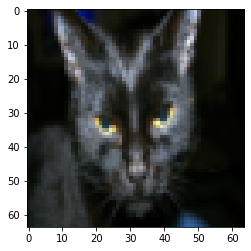

In [7]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Banyak software bugs di dalam deep learning terjadi karena memiliki matrix/vector dengan dimensi yang tidak pas. Jika Anda dapat menjaga ukuran matrix/vector agar semuanya serupa, maka Anda sudah satu langkah lebih jauh di dalam mengeliminasi bugs yang mungkin terjadi.

<a name='ex-1'></a>
### Soal 1
Carilah nilai dari:
    - m_train (jumlah data training)
    - m_test (jumlah data test)
    - num_px (= lebar = tinggi dari data training)
Ingat bahwa `train_set_x_orig` adalah numpy-array dengan ukuran (m_train, num_px, num_px, 3). For instance, you can access `m_train` dengan menuliskan `train_set_x_orig.shape[0]`.

In [8]:
#(kurang lebih diperlukan 3 baris kode untuk menyelesaikan soal ini)
# m_train = 
# m_test = 
# num_px = 
# KODE ANDA DIMULAI SETELAH BARIS INI
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig.shape[1]
assert m_train == 209
assert m_test == 50
assert num_px == 64 


# KODE ANDA BERAKHIR SEBELUM BARIS INI

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Ekspektasi keluaran dari m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


Untuk kenyamanan, Anda harus mengubah ukuran gambar (num_px, num_px, 3) ke dalam bentuk numpy-array (num_px $*$ num_px $*$ 3, 1). Setelah ini, data training (dan test) kita akan menjadi numpy array yang setiap kolomnya merepresentasikan gambar yang sudah diflattened (diratakan). Akan ada m_train (dan m_test) kolom pada data Anda.

<a name='ex-2'></a>
### Soal 2
Ubah training dan test data sets sehingga gambar dengan ukuran (num_px, num_px, 3) diflattened menjadi sebuah vektor dengan ukuran (num\_px $*$ num\_px $*$ 3, 1).

Sebuah trik yang dapat Anda gunakan untuk mem-flatten matriks X dengan ukuran (a,b,c,d) menjadi bentuk (b$*$c$*$d, a) adalah dengan menggunakan:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [9]:
# Reshape the training and test examples
#(kurang lebih diperlukan 2 baris kode untuk menyelesaikan soal ini)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# KODE ANDA DIMULAI SETELAH BARIS INI
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


# KODE ANDA BERAKHIR SEBELUM BARIS INI

# Cek apakah 10 pixels pertama dari gambar kedua berada di dalam lokasi yang tepat
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**Keluaran yang diharapkan**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

Untuk merepresentasikan warna gambar, nilai (RGB) harus dispesifikasikan untuk setiap pixel, jadi nilai dari pixel adalah vektor berisikan 3 buah angka dengan nilai dari 0 sampai dengan 255.

Satu langkah preprocessing umum di dalam pembelajaran mesin adalah untuk menstrandarisasi dataset, berarti kita akan mengekstrak nilai rata-rata dari keseluruhan dataset lalu membaginya dengan nilai standar deviasi dari keseluruhan dataset. Untuk dataset gambar, akan lebih mudah dengan membagi setiap baris dari dataset dengan nilai 255 (nilai maksimum dari sebuah pixel)

<!-- Selamat melatih mode, Anda akan mengalikan bobot dan menambahkan bias pada beberapa inputs dengan tujuan untuk mengobservasi fungsi aktivasi pada neuron. Lalu Anda akan melakukan backpropagation dengan gradients untuk melatih model. Teteapi, sangat penting untuk memastikan setiap fitur gambar memiliki nilai yang serupa sehingga gradient yang kita hitung tidak menjadi besar secara tiba-tiba. Anda akan memahami lebih detail mengenai hal ini di dalam materi perkuliahan.
!--> 

Mari kita standarisasi dataset kita.

In [10]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='white'>
    
    
**Hal yang perlu Anda ingat!:**
Langkah umum untuk melakukan pre-processing dataset baru adalah:
- Mencari tahu dimensi dan ukuran dari masalah yang mau diselesaikan (m_train, m_test, num_px, ..)
- Ubah bentuk dataset sehingga menjadi vektor dengan ukuran (num_px \* num_px \* 3, 1)
- "Standarisasi" data

<a name='3'></a>
## 3 - Arsitektur Umum Algoritma Pembelajaran ##

Sekarang adalah waktunya untuk mendesain algoritma sederhana untuk membedakan gambar cat dan non-cat.

Anda akan membuat Logistic Regression, menggunakan Neural Network. Gambar berikut menjelaskan mengapa **Logistic Regression merupakan Neural Network dengan bentuk sangat sederhana!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Expresi Matematika dari algoritma**:

Sebagai contoh $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Nilai cost lalu dihitung dengan menjumlahkan semua data training:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Langkah kunci**:
Di dalam soal ini, Anda akan melakukan langkah-langkah berikut:
    - Inisialisasi nilai parameter dari model
    - Lakukan proses pembelajaran nilai parameter pada model dengan meminimalisasi cost
    - Gunakan nilai parameter hasil pembelajaran untuk membuat prediksi (pada test set)
    - Analisa hasil dan buat kesimpulan

<a name='4'></a>
## 4 - Membangun Komponen Algoritma Pembelajaran ## 

Langkah utama di dalam membangun Neural Network adalah:
1. Definisikan struktur model (seperti jumlah input features)
2. Inisialisasi parameter model
3. Loop:
    - Hitung current loss (forward propagation)
    - Hitung current gradient (backward propagation)
    - Update nilai parameter (gradient descent)

Anda akan membangun langkah 1-3 secara terpisah lalu menggabungkannya menjadi sebuah fungsi yang kita beri nama `model()`.

<a name='4-1'></a>
### 4.1 - Helper functions

<a name='ex-3'></a>
### Soal 3 - sigmoid
Sebagaimana gambar yang Anda lihat di atas, Anda perlu untuk menghitung $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ untuk membuat prediksi. Gunakan np.exp().

In [11]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(kurang lebih diperlukan 1 baris kode untuk menyelesaikan soal ini)
    # s = ...
    # KODE ANDA DIMULAI SETELAH BARIS INI
    s = 1 / (1+(np.exp(-z)))

    # KODE ANDA BERAKHIR SEBELUM BARIS INI
    
    return s

In [12]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
Selamat! Jawaban Anda benar


In [13]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


<a name='4-2'></a>
### 4.2 - Inisialisasi Parameter

<a name='ex-4'></a>
### Soal 4 - Inisialisasi dengan zeros
Implementasikan inisialisasi parameter dari cell di bawah. Anda perlu menginisialisasi w sebagai vektor bernilai 0. Jika Anda tidak tahu fungsi numpy apa yang digunakan, lihat penjelasan np.zeros() pada dokumentasi Numpy di internet.

In [14]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    #(kurang lebih diperlukan 2 baris kode untuk menyelesaikan soal ini)
    # w = ...
    # b = ...
    # KODE ANDA DIMULAI SETELAH BARIS INI
    w = np.zeros(dim).reshape(dim,1)
    b = float(0)


    # KODE ANDA BERAKHIR SEBELUM BARIS INI

    return w, b

In [15]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test(initialize_with_zeros)

w = [[0.]
 [0.]]
b = 0.0
Selamat! Jawaban Anda benar


<a name='4-3'></a>
### 4.3 - Forward and Backward propagation

Sekarang setelah nilai parameter diinisialisasi, Anda dapat melakukan "forward" dan "backward" propagation di dalam proses learning dari parameters.

<a name='ex-5'></a>
### Exercise 5 - propagate
Implementasikan fungsi `propagate()` yang menghitung cost function dan nilai gradiennya. 

**Petunjuk**:

Forward Propagation:
- Anda dapat X
- Anda hitung $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Anda hitung cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Ada dua formula yang akan Anda gunakan: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [16]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(kurang lebih diperlukan 2 baris kode untuk menyelesaikan soal ini)
    # hitung nilai aktivasi
    # A = ...
    # hitung cost menggunakan np.dot. Jangan gunakan loops untuk menghitung sum
    # cost = ...                                
    # KODE ANDA DIMULAI SETELAH BARIS INI
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*np.sum(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))

    # KODE ANDA BERAKHIR SEBELUM BARIS INI

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(kurang lebih diperlukan 2 baris kode untuk menyelesaikan soal ini)
    # dw = ...
    # db = ...
    # KODE ANDA DIMULAI SETELAH BARIS INI
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A - Y)


    # KODE ANDA BERAKHIR SEBELUM BARIS INI
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [17]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
Selamat! Jawaban Anda benar


**Ekspektasi output**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

<a name='4-4'></a>
### 4.4 - Optimasi
- Anda sudah menginisialisasi nilai parameters.
- Anda sudah bisa menghitung cost function dan nilai gradiennya.
- Sekarang, Anda mau mengupdate nilai parameter dengan menggunakan gradient descent.

<a name='ex-6'></a>
### Soal 6 - optimasi
Tuliskan fungsi optimisasi. Tujuannya adalah melatih $w$ dan $b$ dengan meminimalkan cost function $J$. Untuk nilai parameter $\theta$, formula untuk update nilai adalah $ \theta = \theta - \alpha \text{ } d\theta$, di mana $\alpha$ adalah learning rate.

In [18]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (kurang lebih diperlukan 2 baris kode untuk menyelesaikan soal ini)
        # w = ...
        # b = ...
        # KODE ANDA DIMULAI SETELAH BARIS INI
        w-=learning_rate*dw
        b-=learning_rate*db


        # KODE ANDA BERAKHIR SEBELUM BARIS INI
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
Selamat! Jawaban Anda benar


<a name='ex-7'></a>
### Soal 7 - predict
Fungsi pada cell di atas akan memberikan keluaran berupa nilai w dan b yang sudah diupdate. Kita bisa menggunakan nilai baru w dan b ini untuk meprediksi label dari dataset X. Implementasikan fungsi `predict()`. Ada dua langkah yang diperlukan untuk menghitung prediksi:

1. Kalkulasi $\hat{Y} = A = \sigma(w^T X + b)$

2. Jika nilai aktivasi <= 0.5 maka beri nilai 0 lalu jika nilai aktivasi > 0.5 beri nilai 1, lalu simpan hasil prediksi di dalam vektor `Y_prediction`. Jika Anda ingin, anda dapat menggunakan pernyataan `if`/`else` di dalam `for` loop

In [20]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(kurang lebih diperlukan 1 baris kode untuk menyelesaikan soal ini)
    # A = ...
    # KODE ANDA DIMULAI SETELAH BARIS INI
    A = sigmoid(np.dot(w.T,X)+b)


    # KODE ANDA BERAKHIR SEBELUM BARIS INI
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # KODE ANDA DIMULAI SETELAH BARIS INI
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1


        # KODE ANDA BERAKHIR SEBELUM BARIS INI
    
    return Y_prediction

In [21]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
Selamat! Jawaban Anda benar


<font color='white'>
    
**Hal yang perlu diingat:**

Anda sudah berhasil megnimplementasikan beberapa fungsi:
- Inisialisasi (w,b)
- Optimisasi nilai loss secara iteratif untuk melakukan proses pembelajaran parameter (w,b):
    - Menghitung cost dan gradiennya
    - Mengupdate nilai parameter dengan menggunakan gradient descent
- Menggunakan nilai (w,b) yang sudah diupdate untuk memprediksi label dari sekumpulan set contoh

<a name='5'></a>
## 5 - Gabungkan semua Fungsi menjadi model ##

Anda akan melihat bagaimana keseluruhan model dapat dibentuk dengan menggabungkan semua blok bangun dari fungsi yang sudah dibuat dengan urutan yang tepat.

<a name='ex-8'></a>
### Soal 8 - model
Implementasikan fungsi model. Gunakan notasi berikut:
    - Y_prediction_test untuk prediksi Anda terhadap test set
    - Y_prediction_train untuk prediksi Anda terhadap train set
    - parameters, grads, costs untuk keluaran dari optimize()

In [22]:

# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (kurang lebih diperlukan 1 baris kode untuk menyelesaikan soal ini)  
    # initialize parameters with zeros 
    # w, b = ...
    
    #(kurang lebih diperlukan 1 baris kode untuk menyelesaikan soal ini)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (kurang lebih diperlukan 2 baris kode untuk menyelesaikan soal ini)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # KODE ANDA DIMULAI SETELAH BARIS INI
    w, b = initialize_with_zeros(X_train.shape[0])    
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    w = params["w"]
    b = params["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # KODE ANDA BERAKHIR SEBELUM BARIS INI

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [23]:
from public_tests import *

model_test(model)

Selamat! Jawaban Anda benar


Jika Anda sudah melewati semua test, jalankan cell di bawah ini untuk melatih model Anda.

In [24]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Komentas**: Nilai akurasi training hampir mendekati 100%. Ini adalah contoh baik kalau model yang Anda buat memiliki kemampuan untuk mempelajari training data. Test accuracy

 bernilai 70%. Sebenarnya ini bukan berarti tidak baik karena model yang kita buat hanyalah model sederhana. Kita akan membuat model classifier yang lebih baik di minggu depan!

Juga, Anda melihat kalau model ini sangat jelas mengalami overfitting. Di kelas selanjutnya, nanti Anda akan mempelajari bagaimana cara mengurangi overfitting, sebagai contoh dengan menggunakan regularisasi. Gunakan kode di abwah (dengan mengganti variabel `index`) Anda dapat melihat prediksi gambar lain di dalam test set.

y = 1, you predicted that it is a "cat" picture.


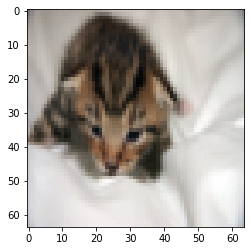

In [25]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Mari plot cost function dan gradiennya.

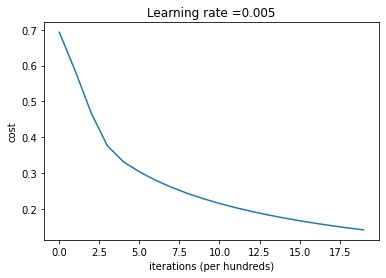

In [26]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretasi**: 
Anda dapat melihat penurunan cost. Ini menunjukkan bahwa parameter sedang dipelajari. Namun, Anda melihat bahwa Anda dapat melatih model lebih banyak lagi di set pelatihan. Cobalah untuk meningkatkan jumlah iterasi dalam sel di atas dan jalankan kembali sel. Anda mungkin melihat bahwa akurasi set pelatihan naik, tetapi akurasi set tes turun. Ini disebut overfitting.